In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('data/BTC-USD_training_data_data.csv',index_col='Date',parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [19]:
def plot_pred(test,pred):
    plt.plot(test, color='r',label='Actual Bitcoin price')
    plt.plot(pred, color='b',label='predicted Bitcoin price')
    plt.title('pedicted Bitcoin price')
    plt.xlabel('time')
    plt.ylabel('Bitcoin price')
    plt.legend()
    plt.show()
    
def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test,pred))
    print('Root MSE = {}.'.format(rmse))

In [20]:
train_set = df[:'2020'].iloc[:,1:2].values
test_set = df['2021':].iloc[:,1:2].values

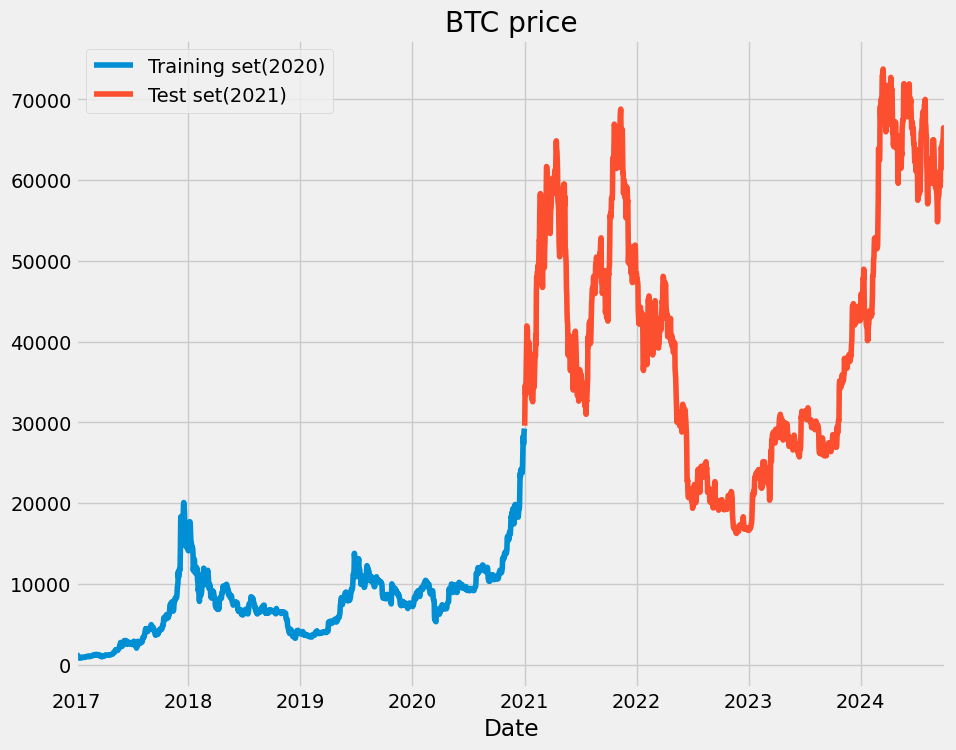

In [21]:
df['High'][:'2020'].plot(figsize=(10,8),legend=True)
df['High']['2021':].plot(figsize=(10,8),legend=True)
plt.legend(['Training set(2020)','Test set(2021)'])
plt.title('BTC price')
plt.show()

In [22]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_sc = sc.fit_transform(train_set)

In [23]:
train_set_sc.shape

(1461, 1)

In [24]:
x_train = []
y_train = []
for i in range(60,1461):
    x_train.append(train_set_sc[i-60:i,0])
    y_train.append(train_set_sc[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [25]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [27]:
# LSTM
model_lstm = Sequential()

#1
model_lstm.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model_lstm.add(Dropout(0.2))

#2
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#3
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#4
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))

#Output
model_lstm.add(Dense(units=1))

#Compile RNN
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')

#Fit training set
model_lstm.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.0120
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0063
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0046
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0043
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0040
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0032
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0031
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0030
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0028
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0023
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0026
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0024
Epoch 13/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0023
Epoch 14/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0020
Epoch 15/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0022
Ep

In [28]:
df_total = pd.concat((df['High'][:'2020'],df['High']['2021':]),axis=0)
inputs = df_total[len(df_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(1435, 1)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


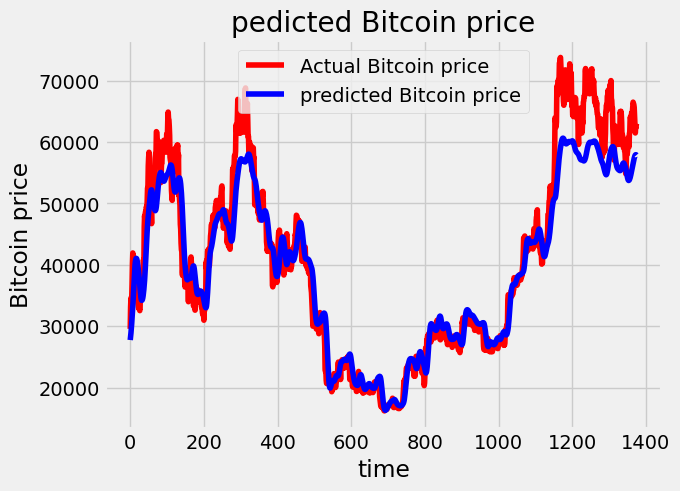

In [29]:
x_test=[]
for i in range(60,1435):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_harga = model_lstm.predict(x_test)
pred_harga = sc.inverse_transform(pred_harga)
plot_pred(test_set,pred_harga)

In [30]:
return_rmse(test_set,pred_harga)

Root MSE = 4546.948494069166.


In [31]:
model_lstm.save('model.h5')